Adam Dubsky
December 2021

This basic machine learning program uses the iris data set from sklearn


In [1]:
import matplotlib.pyplot as matplt
import numpy as np

In [2]:
from sklearn.datasets import load_iris

In [23]:
from sklearn.preprocessing import StandardScaler

In [28]:
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
data = load_iris()

Analyze the data

In [36]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

By looking at the DECR we will be able to get a better understanding of the data we are looking at and how it can be used

In [37]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Looking at the data we can see that there are four different variable that lead to the outcome.
Sepal Width, Sepal length, petal length, and petal width

For each of these variables we have the min, max, mean, standard deviation, and class correlation

There are three different classifications of Iris's, those are Iris-Setosa, Iris-Versicolour, and Iris-Virginica

We can also see that there are no missing attribute values and a class distribution of 33.3%

In [38]:
x = data.data
y = data.target

In [39]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [40]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Looking at the data we can see that the data is in an array format of [sepal length, sepal width, petal length, petal width]

Our target values are given as values of 0, 1, 2. These values represent the final classification given the x values

0 representing Iris-Setosa
1 representing Iris-Versicolour
2 representing Iris-Virginica

visualize the data for a better understanding

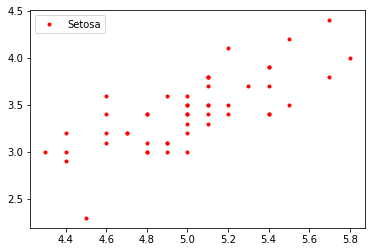

In [41]:
matplt.plot(x[:, 0][y==0], x[:, 1][y == 0], 'r.', label = 'Setosa')
matplt.legend()
matplt.show()

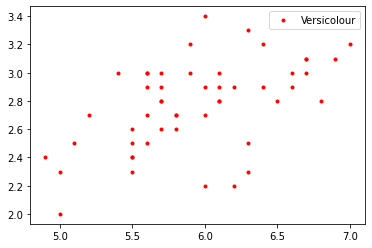

In [42]:
matplt.plot(x[:, 0][y==1], x[:, 1][y == 1], 'r.', label = 'Versicolour')
matplt.legend()
matplt.show()

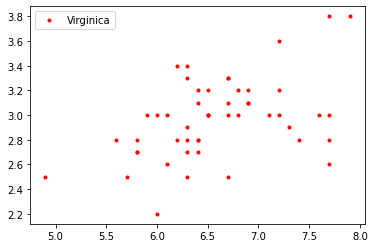

In [43]:
matplt.plot(x[:, 0][y==2], x[:, 1][y == 2], 'r.', label = 'Virginica')
matplt.legend()
matplt.show()

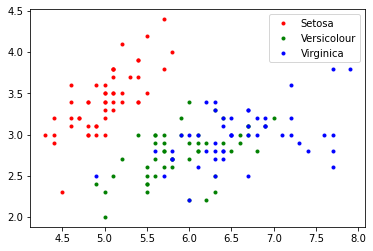

In [44]:
matplt.plot(x[:, 0][y==0], x[:, 1][y == 0], 'r.', label = 'Setosa')
matplt.plot(x[:, 0][y==1], x[:, 1][y == 1], 'g.', label = 'Versicolour')
matplt.plot(x[:, 0][y==2], x[:, 1][y == 2], 'b.', label = 'Virginica')
matplt.legend()
matplt.show()

Now lets evaluate the total area 

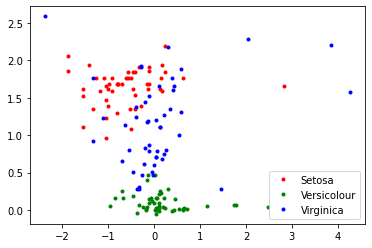

In [57]:
matplt.plot(x[:, 0][y==0]*x[:, 1][y == 0], x[:, 2][y==0]*x[:, 3][y == 0], 'r.', label = 'Setosa')
matplt.plot(x[:, 0][y==1]*x[:, 1][y == 1], x[:, 2][y==1]*x[:, 3][y == 1], 'g.', label = 'Versicolour')
matplt.plot(x[:, 0][y==2]*x[:, 1][y == 2], x[:, 2][y==2]*x[:, 3][y == 2], 'b.', label = 'Virginica')
matplt.legend()
matplt.show()

Now we can begin to see some correlation between the area and the classification of the Iris

If we go back to the description we see that "One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other."

In this case the class that is linearly seperable is the Setosa class

In [58]:
x = StandardScaler().fit_transform(x)

In [59]:
x

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

Split the data into train and test cases

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

Use logistic regression to create the model

In [61]:
log_reg = LogisticRegression()

In [62]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [63]:
log_reg.score(x_test, y_test)

0.8947368421052632

In [64]:
log_reg.score(x, y)

0.96

We end with an accuracy score of about 96%